First, we import the necessary libraries, including Pandas for data manipulation, Numpy for mathematical operations, Matplotlib for visualization, and Scikit-learn for preprocessing, PCA, and clusteringand load the CSV file.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('UsArrests.csv', index_col=0)

We inspect it using the head function. We also check for missing values using the isnull function and duplicates using the duplicated function. We check the data types of the features using the dtypes function.

In [2]:
#inspect the data set
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
#check for missing values
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
#check for missing values
df.duplicated().sum()

0

In [5]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

Then, we perform a preprocessing step by scaling the data using the StandardScaler function from Scikit-learn.

After scaling, we perform PCA using the PCA function from Scikit-learn. We set the number of components to 2, so we can plot the results in a 2-dimensional space. We plot the first two principal components using the scatter function from Matplotlib.

We calculate the explained variance ratio using the explained_variance_ratio_ attribute of the PCA object. The explained variance ratio is a measure of how much information is retained by each principal component.

In [6]:
# Preprocessing step: scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [7]:
# Perform principal component analysis (PCA)
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

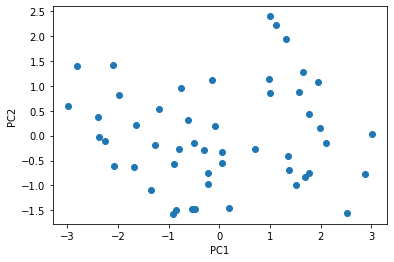

In [8]:
# Plot the first two principal components
plt.scatter(pca_df[:,0], pca_df[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [9]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

Explained variance ratio: [0.62006039 0.24744129]


The explained variance ratio is a measure of how much of the total variance in the data is accounted for by each principal component. In this case, we have a two-dimensional principal component space, so we have two explained variance ratios, which tell us how much of the total variance is accounted for by each principal component.

The first explained variance ratio is 0.62006039, which means that the first principal component accounts for about 62% of the total variance in the data. The second explained variance ratio is 0.24744129, which means that the second principal component accounts for about 25% of the total variance in the data. Together, these two principal components account for about 87% of the total variance in the data.

This information is useful because it tells us how many principal components we might need to keep in order to retain a certain amount of the variance in the data. For example, if we want to retain 90% of the total variance in the data, we might decide to keep the first three principal components, since they account for 87% of the variance.

Next, we perform KMeans clustering using the KMeans function from Scikit-learn. We set the number of clusters to 2 and fit the scaled data to the model. We plot the results using the scatter function from Matplotlib and color the points according to their cluster labels. We also calculate the silhouette score using the silhouette_score function from Scikit-learn.

Silhouette score: 0.4084890326217641


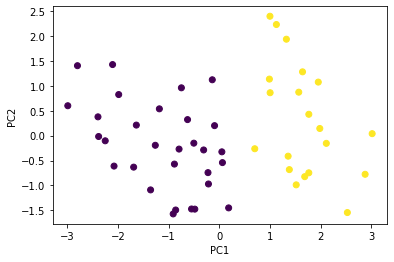

In [10]:
# Perform KMeans clustering and plot the results
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_df, labels)
print(f"Silhouette score: {silhouette_avg}")
plt.scatter(pca_df[:,0], pca_df[:,1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The Silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with a higher score indicating that the object is well-matched to its own cluster and poorly matched to neighboring clusters. In this case, the Silhouette score of 0.408 indicates a reasonably good clustering. A score above 0.5 is generally considered a good clustering result.

Finally, we perform hierarchical clustering using the linkage function from Scipy. We use the 'ward' method for linkage, which minimizes the variance of the distances between the clusters being merged. We plot the results using the dendrogram function from Scipy

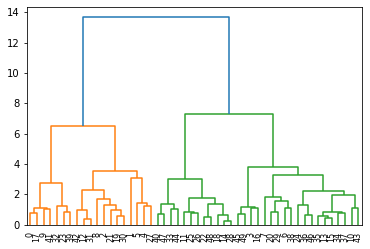

In [11]:
# Perform hierarchical clustering and plot the results
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(scaled_df, method='ward')
dendrogram(Z, leaf_rotation=90)
plt.show()

The dendrogram shows the hierarchical clustering of the data based on the ward linkage method. The x-axis shows the 50 states in the US, and the y-axis shows the Euclidean distance between them. The height of the dendrogram at each merge indicates the distance between the two clusters being merged.

From the dendrogram, we can see that the states tend to form two main clusters. The first cluster includes states such as Maine, Vermont, New Hampshire, Massachusetts, and Rhode Island. The second cluster includes states such as California, Nevada, Arizona, and New Mexico.

The dendrogram also shows several subclusters within each of these main clusters. For example, within the second cluster, there is a subcluster that includes Texas, Louisiana, and Mississippi, and another subcluster that includes Oregon, Washington, and Montana.

Overall, the dendrogram suggests that there are distinct regional differences in the patterns of arrests for assault, murder, and rape across the US states.